# Predicting Default Payments with Fully-Connected NNs

The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Dataset Description

This dataset contains information on default payments, demographic factors, credit data, payment history, and bill statements of credit card clients in Taiwan, covering data from April 2005 to September 2005.

### Target Variable
The dataset uses a binary variable to indicate whether a credit card payment occurred:
- **1** = Payment occurred
- **0** = No payment

### Features

The dataset includes 24 explanatory variables:

1. **LIMIT_BAL**: Amount of credit granted (in local currency), which includes both individual and family (supplementary) credit.
2. **SEX**: Gender
   - 1 = Male
   - 2 = Female
3. **EDUCATION**: Education level
   - 1 = Graduate school
   - 2 = University
   - 3 = High school
   - 4 = Others
   - 5, 6 = Unknown
4. **MARRIAGE**: Marital status
   - 1 = Married
   - 2 = Single
   - 3 = Others
5. **AGE**: Age in years.

6-11. **Payment History**: Payment status from April to September, with each month represented by one variable:
   - Scale: -1 (paid on time) to 9 (delay of nine months or more)
   - **Variable 6**: Payment status in September
   - **Variable 7**: Payment status in August
   - **Variable 8**: Payment status in July
   - **Variable 9**: Payment status in June
   - **Variable 10**: Payment status in May
   - **Variable 11**: Payment status in April

12-17. **Monthly Bill Statements**: Amount of monthly billing (in local currency) from April to September.

18-23. **Previous Payments**: Monthly payment amounts (in local currency) made from April to September.

This dataset serves as a resource for predicting credit card payment defaults and assessing credit risk through fully-connected neural networks.







##Inspecting the data



**Dataset Analysis Approach**

The dataset analysis was conducted using the following approach:

**1. Exploratory Data Analysis**
An initial exploratory analysis of the dataset was carried out to ensure data quality, focusing on identifying any missing values, obtaining descriptive statistics, and gathering general dataset information.

**2. Target Variable Analysis**
A detailed analysis of the target variable, the binary variable indicating default payments, was performed to assess its distribution and balance within the dataset.

**3. Feature Analysis and Correlation**
A specific analysis of the features was conducted, examining their individual distributions, relationships to each other, and correlations with the target variable to uncover insights that could enhance model learning.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 1/train.csv'

df = pd.read_csv(file_path)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,19193,200000,2,1,1,38,-2,-2,-2,-2,...,2571,2571,2571,2772,2571,2571,2571,2571,2571,0
1,1131,230000,2,2,1,34,0,0,0,0,...,155335,153427,150514,8913,5449,5339,5370,4435,4432,1
2,17557,50000,2,2,2,42,0,0,0,0,...,49311,24663,24854,1763,2112,1756,324,336,351,0
3,29901,20000,1,2,2,29,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,14696,30000,2,3,1,59,1,2,2,2,...,30467,29858,28898,1950,200,2492,0,580,0,1


### Exploratory Data Analysis

In [ ]:
df.shape

(25500, 25)

In [ ]:
df.dtypes

,0
ID,int64
LIMIT_BAL,int64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          25500 non-null  int64
 1   LIMIT_BAL                   25500 non-null  int64
 2   SEX                         25500 non-null  int64
 3   EDUCATION                   25500 non-null  int64
 4   MARRIAGE                    25500 non-null  int64
 5   AGE                         25500 non-null  int64
 6   PAY_0                       25500 non-null  int64
 7   PAY_2                       25500 non-null  int64
 8   PAY_3                       25500 non-null  int64
 9   PAY_4                       25500 non-null  int64
 10  PAY_5                       25500 non-null  int64
 11  PAY_6                       25500 non-null  int64
 12  BILL_AMT1                   25500 non-null  int64
 13  BILL_AMT2                   25500 non-null  int64
 14  BILL_A

It seems there are no missing values; let's double-check

In [ ]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,25500.00000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,...,25500.000000,25500.000000,25500.000000,25500.000000,2.550000e+04,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,14956.95702,167569.007059,1.604118,1.852353,1.550392,35.509294,-0.013098,-0.130784,-0.163294,-0.218235,...,43336.952196,40307.121059,38924.328157,5594.010863,5.934389e+03,5319.529647,4812.161373,4812.480431,5236.509176,0.222941
std,8667.36982,130002.156470,0.489049,0.787991,0.522757,9.200408,1.126314,1.199481,1.199697,1.169681,...,64433.082446,60870.691089,59659.509920,16235.253410,2.381277e+04,18157.653215,15560.524538,15206.108094,17958.888070,0.416227
min,1.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7432.75000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2338.750000,1767.250000,1266.750000,1000.000000,8.270000e+02,396.000000,291.000000,251.000000,125.750000,0.000000
50%,14942.50000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19111.000000,18112.500000,17150.000000,2100.000000,2.002000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22431.25000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54475.000000,50178.250000,49132.500000,5006.000000,5.000000e+03,4560.500000,4000.000000,4071.500000,4000.000000,0.000000
max,30000.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


### Target Variable Analysis

The target variable name isn't very practical, so I decided to replace 'default payment next month' with 'IS_DEFAULT'

In [ ]:
df.rename(columns={'default payment next month': 'IS_DEFAULT'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IS_DEFAULT
0,19193,200000,2,1,1,38,-2,-2,-2,-2,...,2571,2571,2571,2772,2571,2571,2571,2571,2571,0
1,1131,230000,2,2,1,34,0,0,0,0,...,155335,153427,150514,8913,5449,5339,5370,4435,4432,1
2,17557,50000,2,2,2,42,0,0,0,0,...,49311,24663,24854,1763,2112,1756,324,336,351,0
3,29901,20000,1,2,2,29,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,14696,30000,2,3,1,59,1,2,2,2,...,30467,29858,28898,1950,200,2492,0,580,0,1


In [ ]:
df['IS_DEFAULT'].describe()

,IS_DEFAULT
count,25500.000000
mean,0.222941
std,0.416227
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df['IS_DEFAULT'].value_counts()

,count
IS_DEFAULT,
0,19815
1,5685


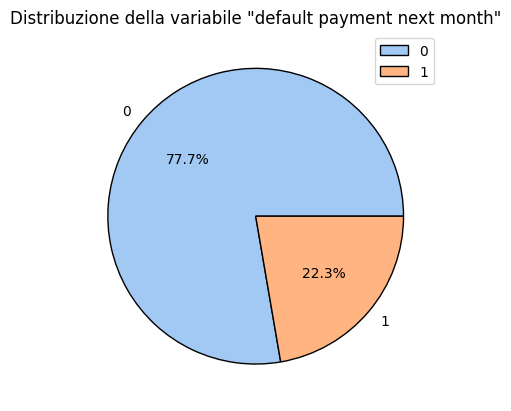

In [ ]:
plt.pie(df['IS_DEFAULT'].value_counts(), labels=["0", "1"], autopct='%1.1f%%',
        colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'black'})
plt.legend()
plt.title("Distribuzione della variabile \"default payment next month\"")
plt.show()

The dataset is not balanced at all about 22% of the customers will default, while 77.7% will not default.


### Feature Analysis and Correlation

I'll go on to observe the unique values and their counts for each categorical variable. This helps in identifying valid categories and spotting any inconsistencies

In [ ]:
print("Unique values and counts for SEX:")
print(df['SEX'].value_counts())
print("\n")

print("Unique values and counts for EDUCATION:")
print(df['EDUCATION'].value_counts())
print("\n")

print("Unique values and counts for MARRIAGE:")
print(df['MARRIAGE'].value_counts())
print("\n")

for i in [0, 2, 3, 4, 5, 6]:
    column_name = f'PAY_{i}'
    print(f"Unique values and counts for {column_name}:")
    print(df[column_name].value_counts())
    print("\n")

Unique values and counts for SEX:
SEX
2    15405
1    10095
Name: count, dtype: int64


Unique values and counts for EDUCATION:
EDUCATION
2    11971
1     8976
3     4162
5      227
4      105
6       46
0       13
Name: count, dtype: int64


Unique values and counts for MARRIAGE:
MARRIAGE
2    13524
1    11647
3      280
0       49
Name: count, dtype: int64


Unique values and counts for PAY_0:
PAY_0
 0    12518
-1     4856
 1     3138
-2     2313
 2     2282
 3      269
 4       62
 5       25
 8       18
 6       11
 7        8
Name: count, dtype: int64


Unique values and counts for PAY_2:
PAY_2
 0    13368
-1     5144
 2     3352
-2     3199
 3      277
 4       83
 1       24
 5       23
 7       19
 6       10
 8        1
Name: count, dtype: int64


Unique values and counts for PAY_3:
PAY_3
 0    13378
-1     5067
-2     3454
 2     3258
 3      205
 4       69
 6       22
 7       22
 5       18
 1        4
 8        3
Name: count, dtype: int64


Unique values and counts for PA

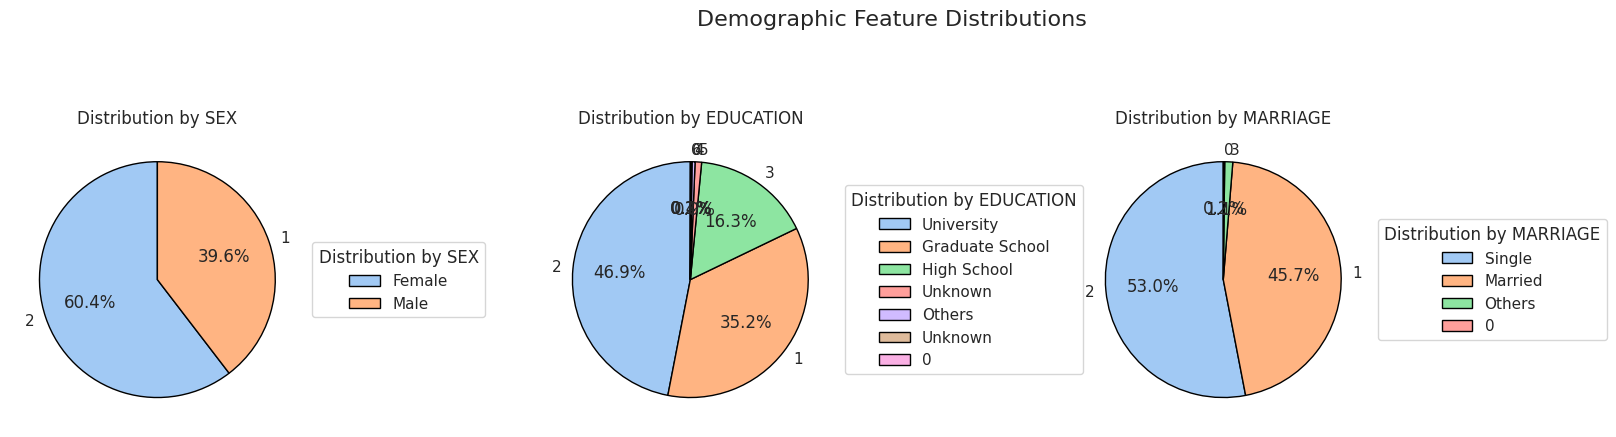

In [ ]:
sns.set_theme(style="whitegrid")

sex_labels = {1: 'Male', 2: 'Female'}
education_labels = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others', 5: 'Unknown', 6: 'Unknown'}
marriage_labels = {1: 'Married', 2: 'Single', 3: 'Others'}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

def pie_chart(data, column, ax, title, labels_dict):
    values = data[column].value_counts()
    sizes = values.values
    labels = [labels_dict.get(i, i) for i in values.index]
    wedges, _, _ = ax.pie(sizes, labels=values.index, autopct='%1.1f%%', startangle=90,
                          colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'black'})
    ax.set_title(title)
    ax.legend(wedges, labels, title=title, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

pie_chart(df, 'SEX', axes[0], 'Distribution by SEX', sex_labels)
pie_chart(df, 'EDUCATION', axes[1], 'Distribution by EDUCATION', education_labels)
pie_chart(df, 'MARRIAGE', axes[2], 'Distribution by MARRIAGE', marriage_labels)

fig.suptitle('Demographic Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


The dataset has more women than men, indicating that there are more women who possess a credit card than men

For both education and marriage, there are categories labeled as 0 for which no description is given.

Nonetheless, there are generic categories available for both features. Consequently, all labels 5, 6 and 0 in the education variable can be classified under category 4, which corresponds to 'Other.' The same applies to the marriage variable, as only a very small number of features have these labels.

In [ ]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

,count
EDUCATION,
2,11971
1,8976
3,4162
4,391


In [ ]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

,count
MARRIAGE,
2,13524
1,11647
3,329


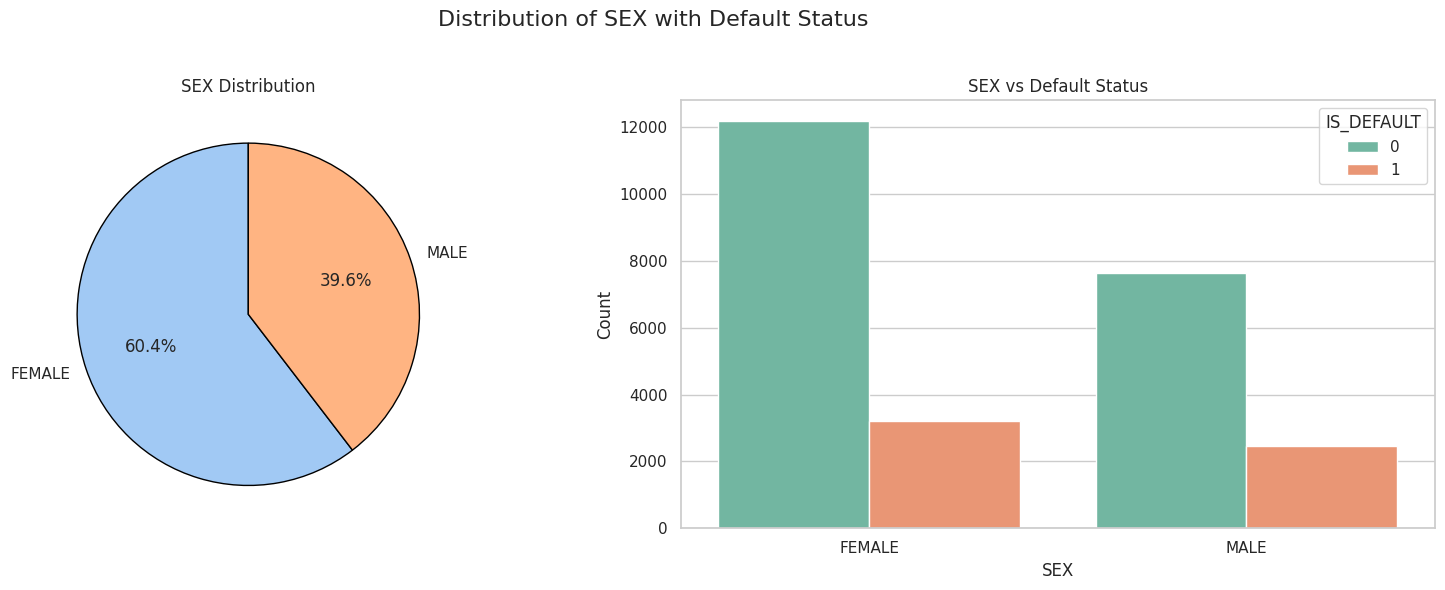

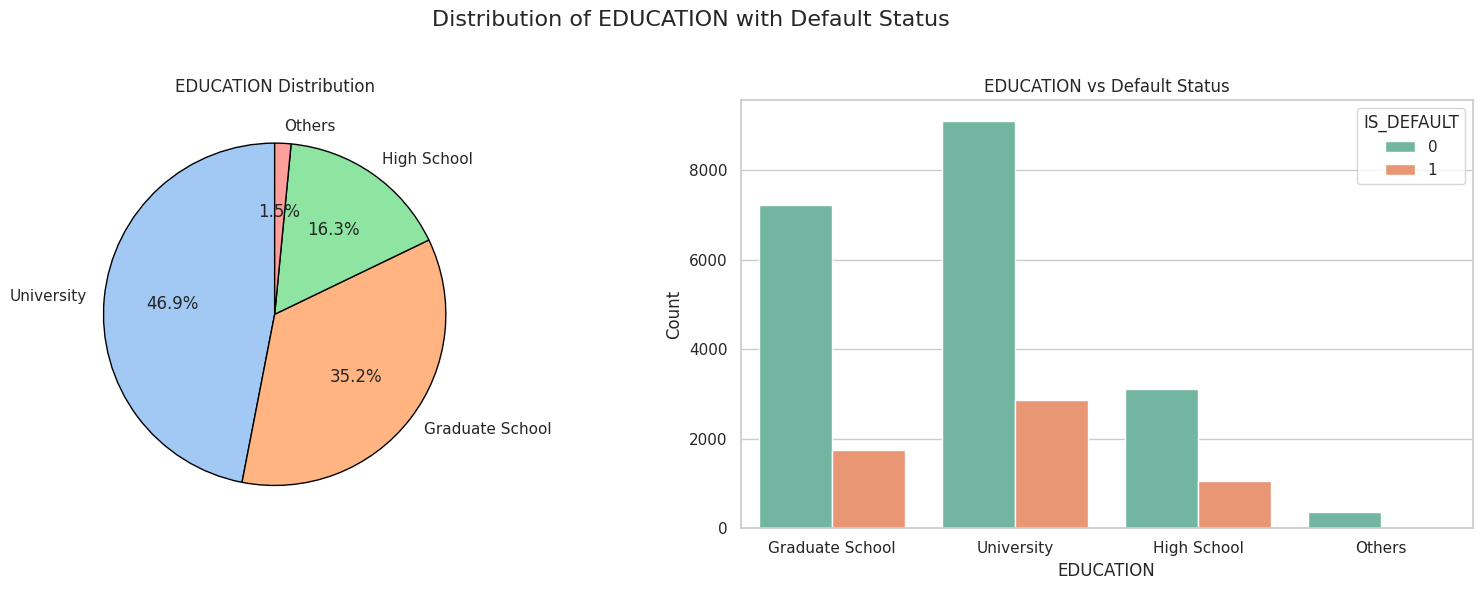

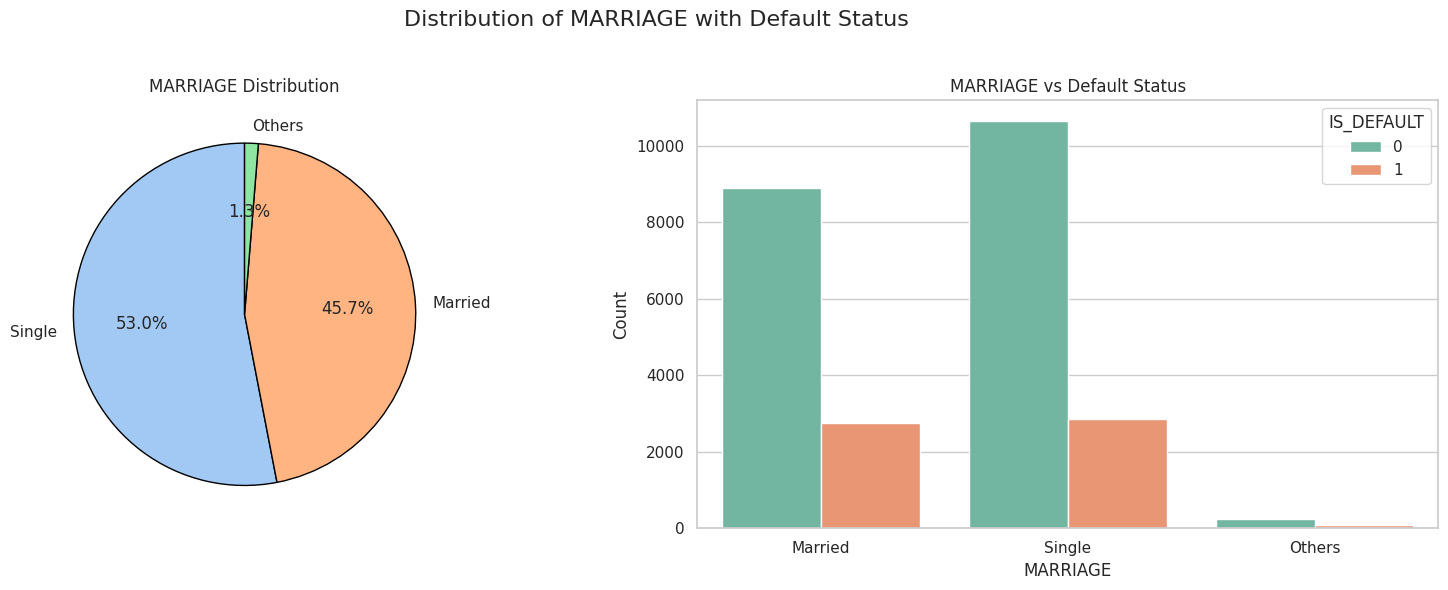

In [ ]:
categorical = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical].copy()
df_cat['IS_DEFAULT'] = df['IS_DEFAULT']
df_cat.replace({
    'SEX': {1: 'MALE', 2: 'FEMALE'},
    'EDUCATION': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'},
    'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Others'}
}, inplace=True)

for column in categorical:
    fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
    fig.suptitle(f'Distribution of {column} with Default Status', fontsize=16)

    df_cat[column].value_counts().plot(
        kind="pie",
        autopct='%1.1f%%',
        startangle=90,
        ax=axes[0],
        colors=sns.color_palette("pastel"),
        wedgeprops={'edgecolor': 'black'}
    )
    axes[0].set_title(f'{column} Distribution')
    axes[0].set_ylabel('')

    sns.countplot(x=column, hue='IS_DEFAULT', data=df_cat, ax=axes[1], palette='Set2')
    axes[1].set_title(f'{column} vs Default Status')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Here are a few observations regarding the categorical features:

* There are more female credit card holders, leading to a higher proportion of female defaulters.
* The proportion of defaulters is notably higher among individuals with higher education levels, but this may also be due to the larger number of individuals with graduate or university education compared to those who completed high school in the dataset.



Let's examine the age distribution to get an idea of which demographic segments of the population we have

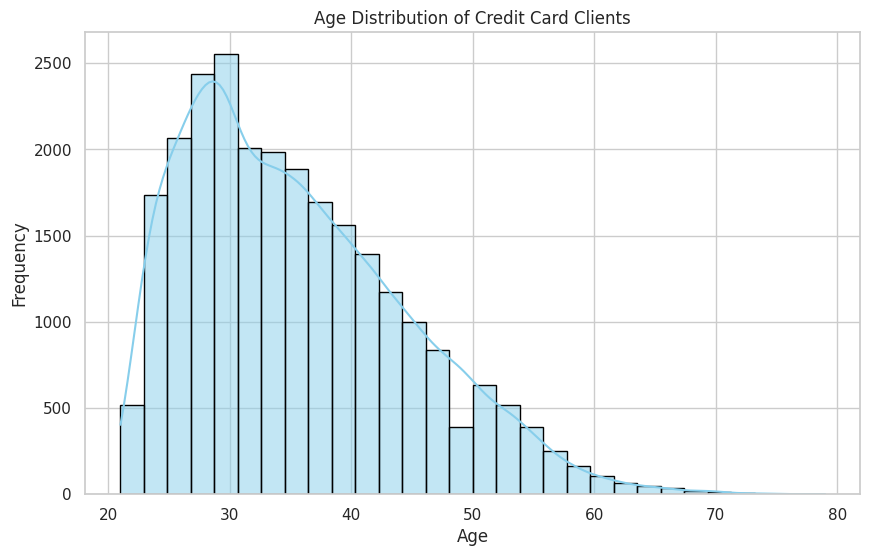

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Credit Card Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

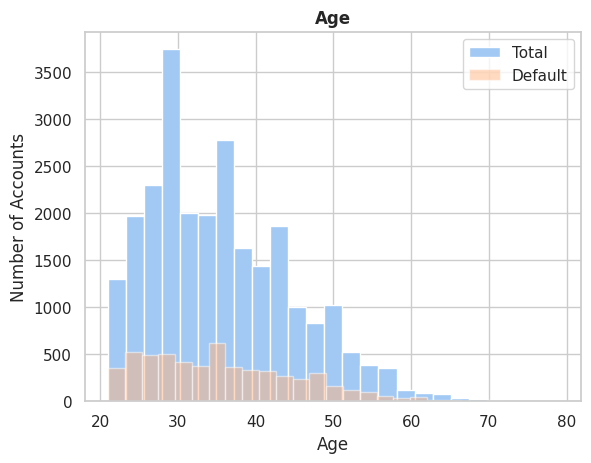

In [ ]:
colors = sns.color_palette('pastel')

plt.hist(df['AGE'], bins=25, color=colors[0], label='Total')
plt.hist(df['AGE'][df['IS_DEFAULT'] == 1], bins=25, color=colors[1], label='Default', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Number of Accounts')
plt.title('Age', fontweight="bold", size=12)

plt.legend()
plt.show()

In conclusion, it is clear that factors such as sex, education, and marital status of individuals do not reliably predict whether they will default on payments

**PAY_X Variable Description**

Regarding the PAY_X variable, I believe there has been a naming error, as they skipped PAY_1, but I don't think this is significant.

In the dataset, the variables PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, and PAY_6 represent the payment status of credit card customers over several months, indicated by a code that specifies whether the payment was made on time or late.

**Payment Status Definitions**

- **PAY_0**: Payment status for September 2005.
- **PAY_2**: Payment status for August 2005.
- **PAY_3**: Payment status for July 2005.
- **PAY_4**: Payment status for June 2005.
- **PAY_5**: Payment status for May 2005.
- **PAY_6**: Payment status for April 2005.

**Meaning of Values**

The numerical value of each of these variables indicates the delay in payment:

- **-1**: Payment was made on time.
- **0**: No delays (payment for the current month).
- **1**: 1 month delay.
- **2**: 2 months delay.
- ...
- **9**: 9 months or more delay.


In [ ]:
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
month_labels = {
    'PAY_0': 'September 2005', 'PAY_2': 'August 2005', 'PAY_3': 'July 2005',
    'PAY_4': 'June 2005', 'PAY_5': 'May 2005', 'PAY_6': 'April 2005'
}

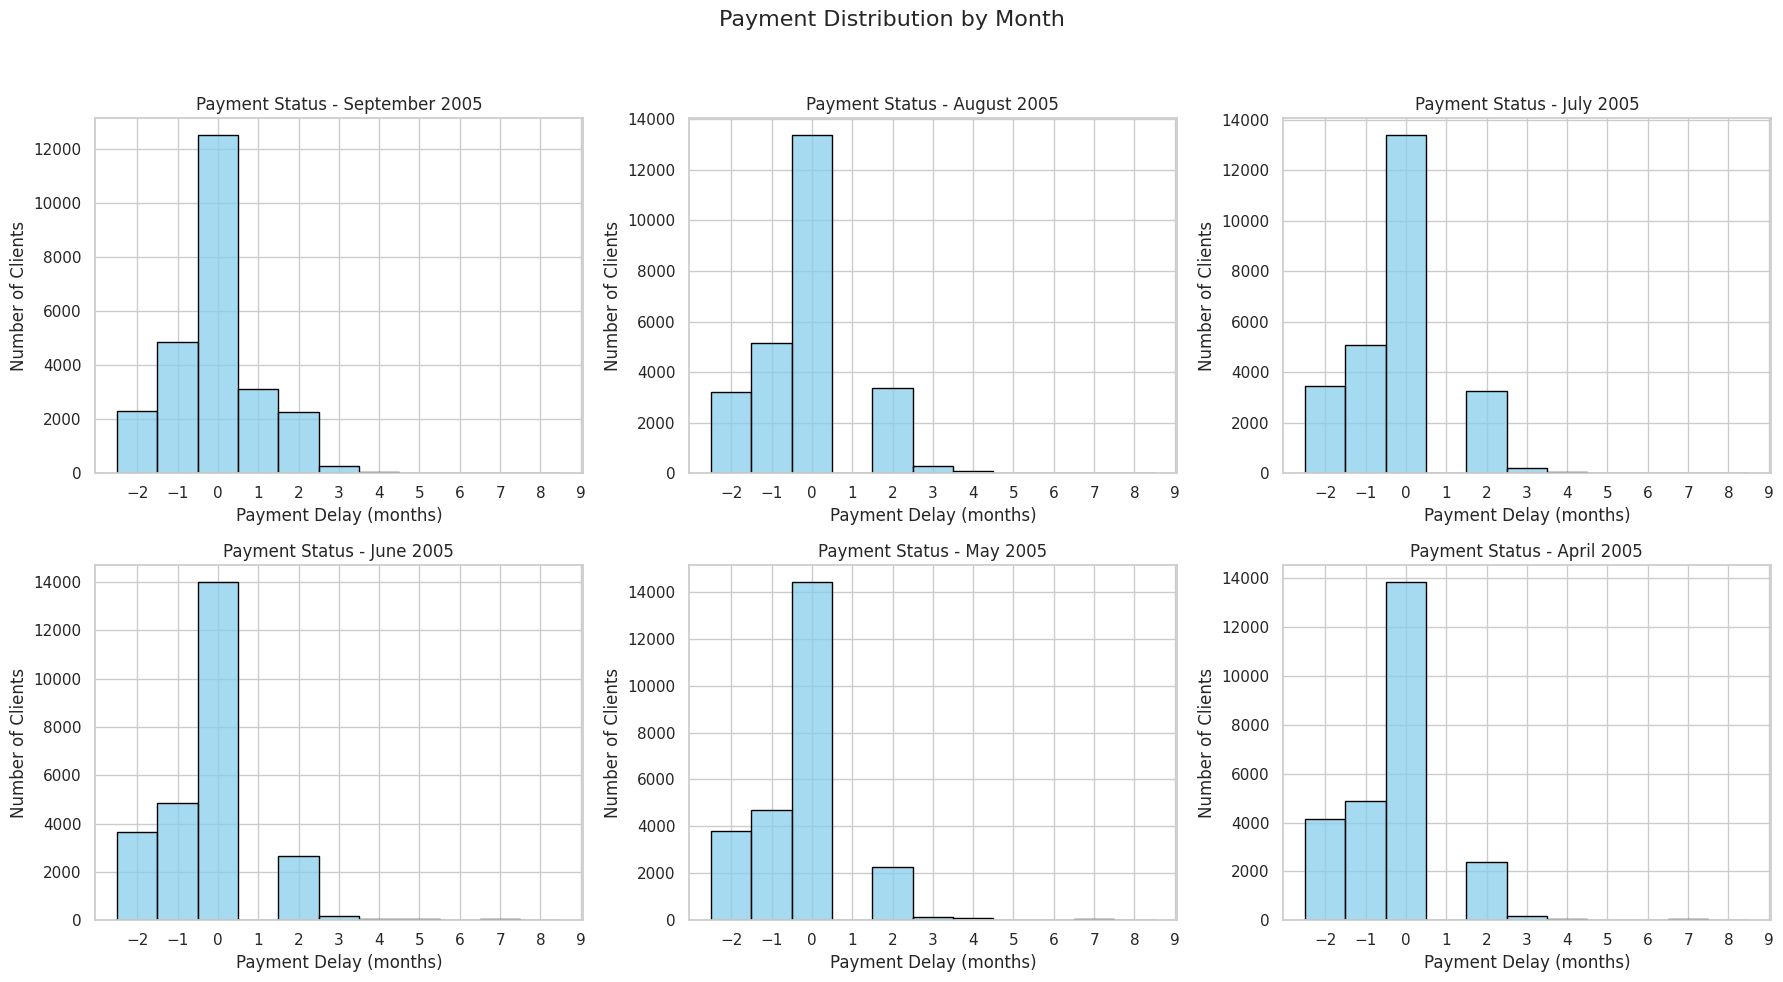

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Payment Distribution by Month', fontsize=16)

for i, col in enumerate(pay_columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[col], bins=11, discrete=True, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Payment Status - {month_labels[col]}')
    ax.set_xlabel('Payment Delay (months)')
    ax.set_ylabel('Number of Clients')
    ax.set_xticks(range(-2, 10))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

But are the same individuals consistently paying late? Let's examine the correlation between these attributes

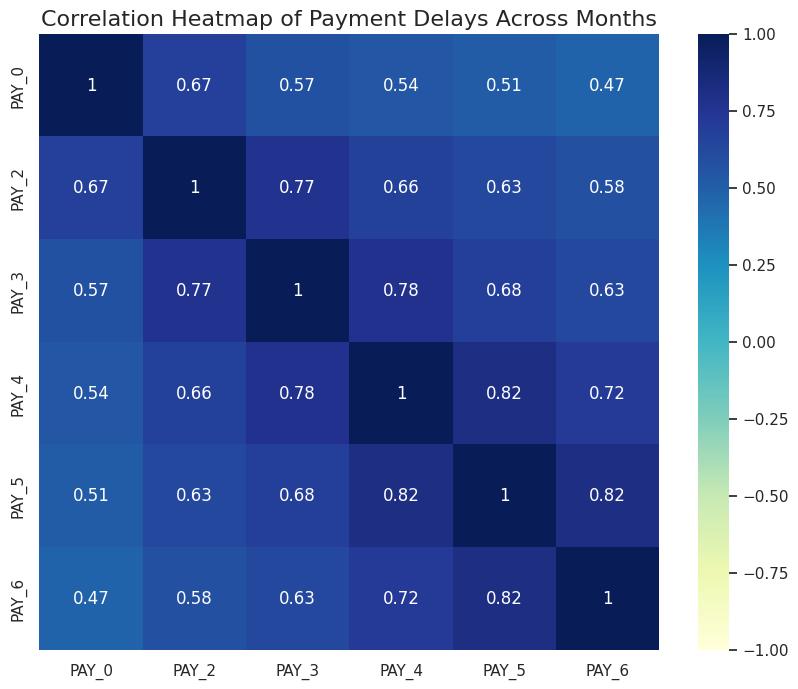

In [ ]:
correlation_matrix = df[pay_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Payment Delays Across Months', fontsize=16)
plt.show()

Looking at the correlation matrix, there are clear patterns indicating that clients with delayed payments in one month are likely to have delayed payments in subsequent months. Here are some observations:
* **Strong correlations over adjacent months**: the correlation values between consecutive months (e.g., PAY_5 and PAY_6, PAY_4 and PAY_5) are notably high, often exceeding 0.7. This suggests that **if a client delays payment in one month, they're more likely to delay in the following month**, showing a pattern of consistent delay.
* **Decreasing correlation over time**: PAY_0 (September) correlates with PAY_6 (April) at around 0.47

This pattern highlights that **recent payment delays could be a strong predictor of future delays**

The LIMIT_BAL variable represents the amount of credit granted to a credit card customer

Let's examine the correlation between LIMIT_BAL and PAY_X to see if there is a relationship between credit limits and payment defaults

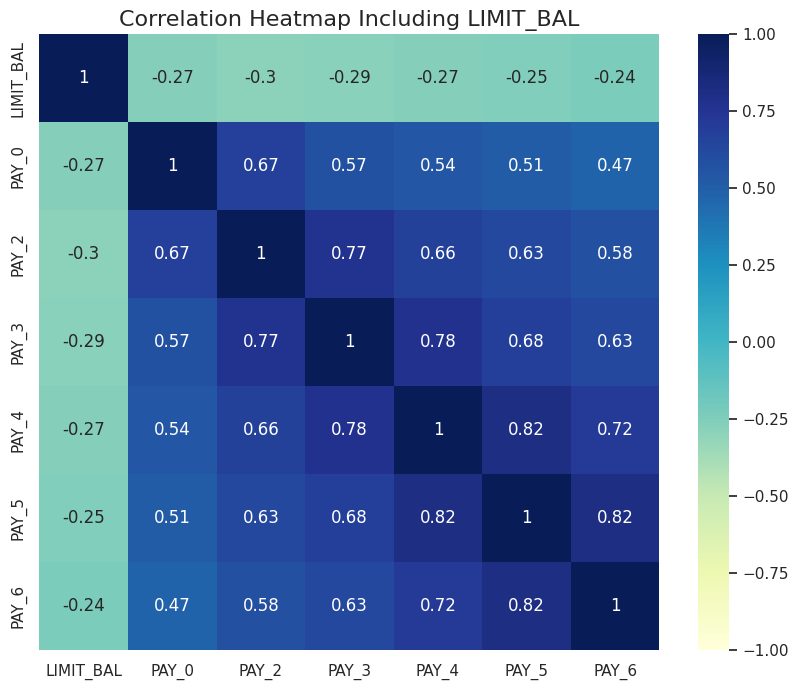

In [ ]:
pay_columns_with_limit = ['LIMIT_BAL'] + pay_columns
correlation_matrix_with_limit = df[pay_columns_with_limit].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_limit, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.title('Correlation Heatmap Including LIMIT_BAL', fontsize=16)
plt.show()

There is a modest negative correlation between LIMIT_BAL and each payment delay variable, ranging from -0.23 to -0.30. **This suggests that clients with higher credit limits tend to have fewer payment delays**. While these correlations are not very strong, they imply that individuals with a larger credit line might be in a better financial position, leading to more consistent or timely payments.

Let's check the limits and information regarding the credit granted:

In [ ]:
df['LIMIT_BAL'].describe()

,LIMIT_BAL
count,25500.000000
mean,167569.007059
std,130002.156470
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


**Variables 12-17**: Monthly billing amounts (in local currency), tracking statements from September to April.


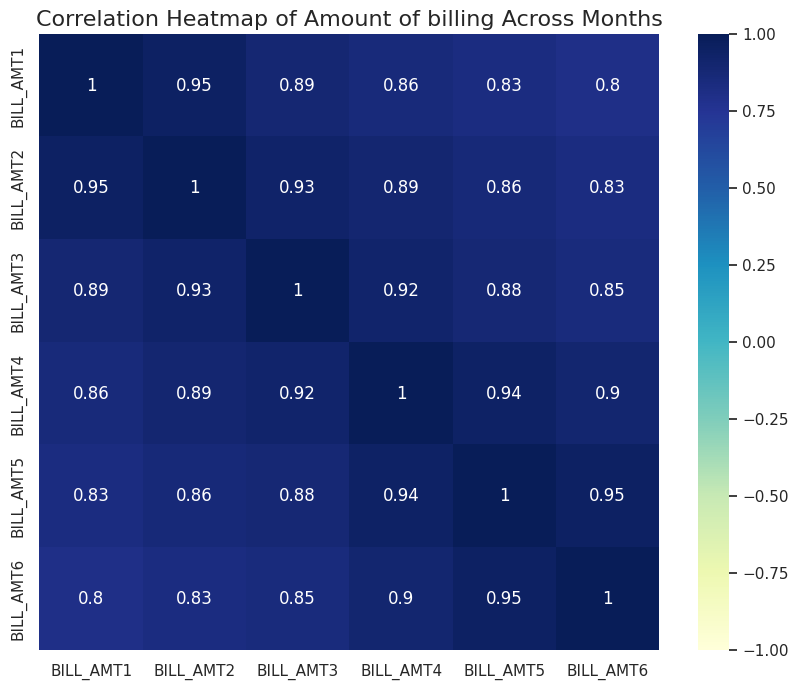

In [ ]:
bills_values = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
correlation_matrix = df[bills_values].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Amount of billing Across Months', fontsize=16)
plt.show()

This correlation matrix shows a high degree of positive correlation among the six monthly billing amounts (from BILL_AMT1 to BILL_AMT6), suggesting that the **amounts billed are relatively consistent month-over-month**.

The high correlation across billing amounts could indicate a lack of significant seasonal variations in monthly billing, implying that spending or billing is relatively stable over the period from September to April.

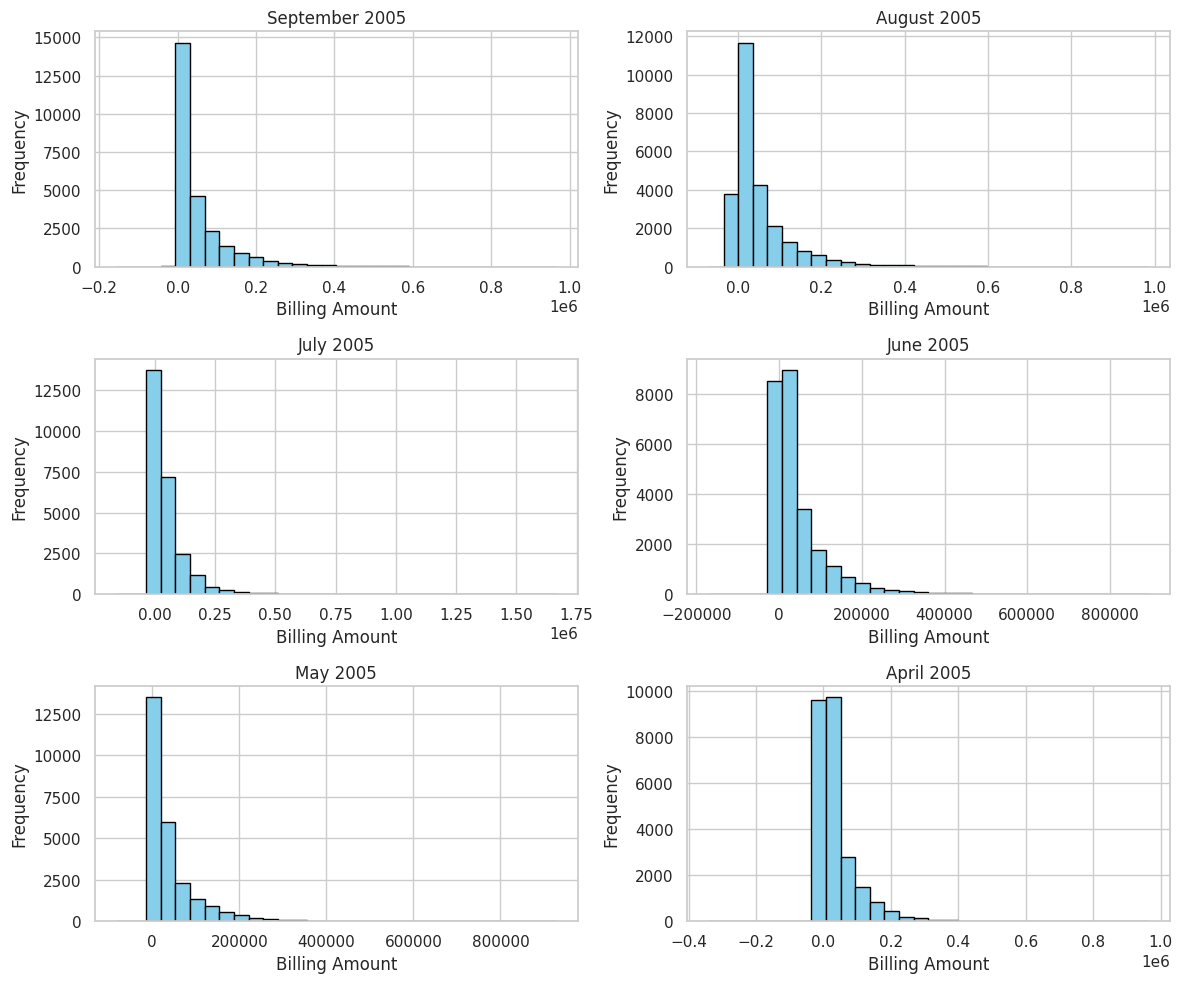

In [ ]:
month_labels = {
    'BILL_AMT1': 'September 2005', 'BILL_AMT2': 'August 2005', 'BILL_AMT3': 'July 2005',
    'BILL_AMT4': 'June 2005', 'BILL_AMT5': 'May 2005', 'BILL_AMT6': 'April 2005'
}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, bill in enumerate(bills_values):
    ax = axes[i]
    ax.hist(df[bill], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f"{month_labels[bill]}")
    ax.set_xlabel("Billing Amount")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

**Variables 18-23**: Amount of previous payments (in local currency), corresponding to monthly payments made from September to April.


<Axes: >

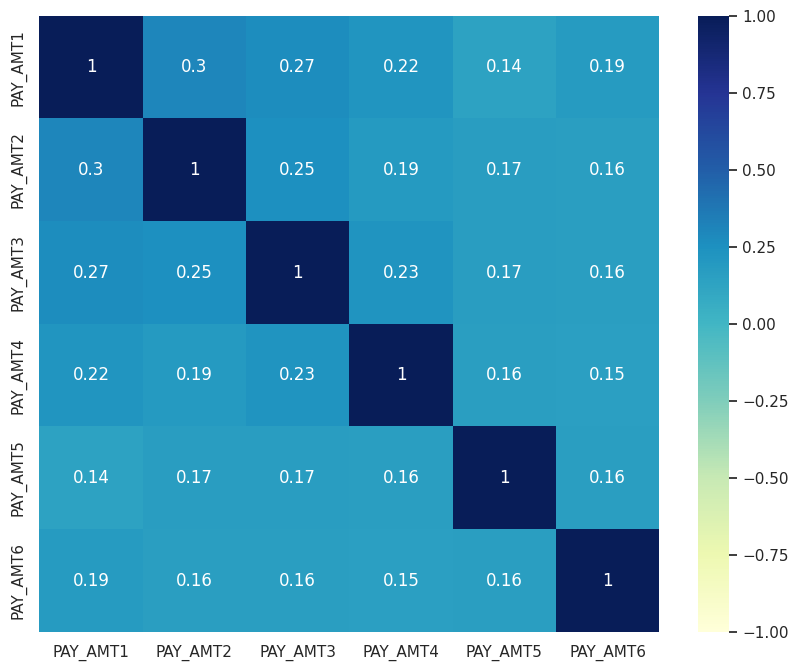

In [ ]:
previose_payment = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

correletion_payemnt = df[previose_payment].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correletion_payemnt, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

There is a pattern of **moderate correlation between adjacent monthly** payment amounts and the correlation values generally decrease as the time gap between payments increases.

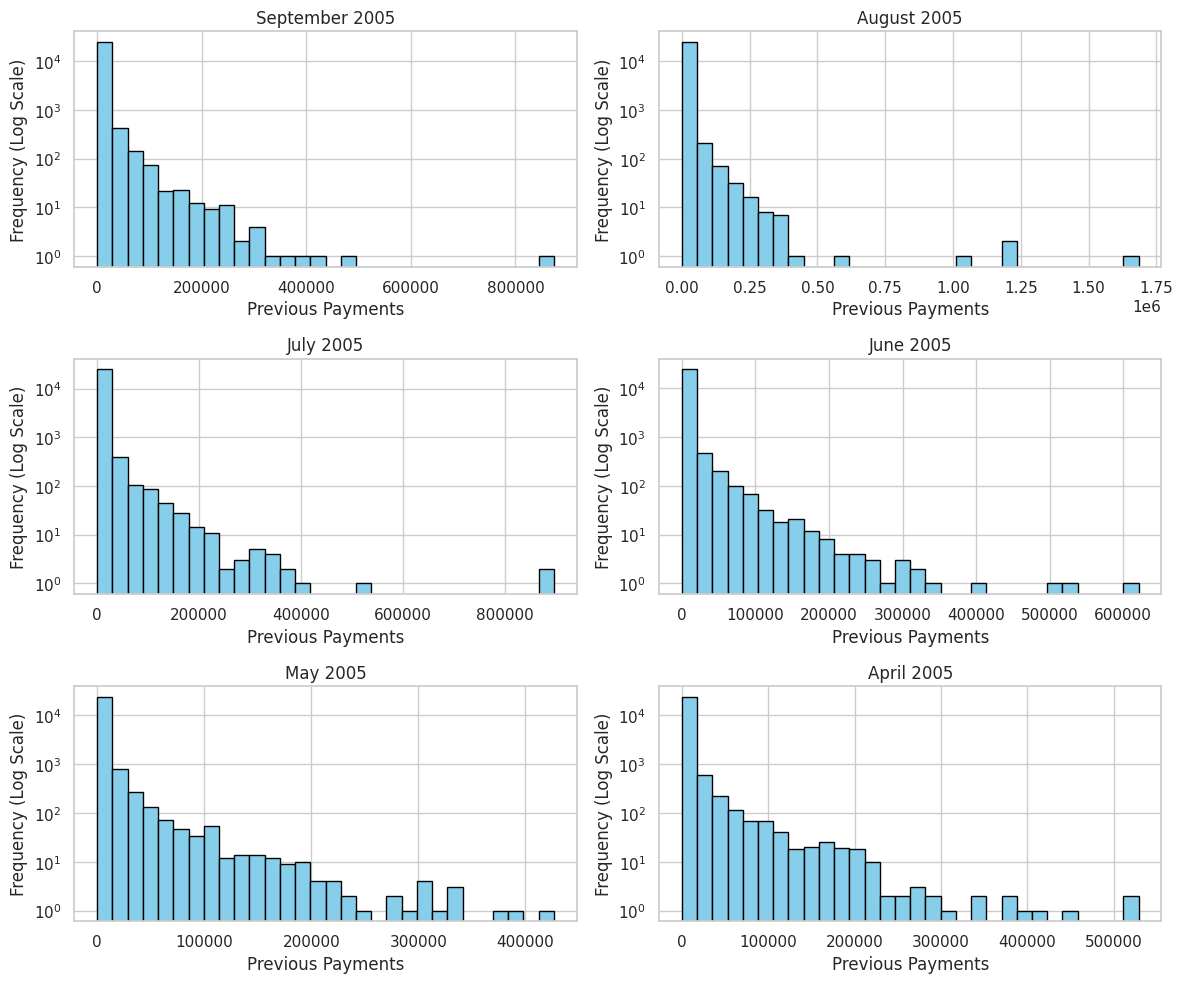

In [ ]:
month_labels = {
    'PAY_AMT1': 'September 2005', 'PAY_AMT2': 'August 2005', 'PAY_AMT3': 'July 2005',
    'PAY_AMT4': 'June 2005', 'PAY_AMT5': 'May 2005', 'PAY_AMT6': 'April 2005'
}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, bill in enumerate(previose_payment):
    ax = axes[i]
    ax.hist(df[bill], bins=30, color='skyblue', edgecolor='black')
    # reduces the prominence of higher frequencies, making the distribution clearer
    ax.set_yscale('log')
    ax.set_title(f"{month_labels[bill]}")
    ax.set_xlabel("Previous Payments")
    ax.set_ylabel("Frequency (Log Scale)")

plt.tight_layout()
plt.show()

## Preparing the data

describe the choice made during the preprocessing operations, also taking into account the previous considerations during the data inspection.

From the initial data inspection, the following insights emerged:

- **No Missing Values**: The dataset contains no null values
- **Demographic Factors and Default**: Attributes like sex, education, and marital status show limited predictive value for determining default risk
- **Patterns in Payment Delays**: There is a strong positive correlation in payment delays across adjacent months, suggesting that clients who delay payments in one month are likely to delay in the following month, indicating a trend of consistent delay
- **Credit Limit and Payment Delays**: A modest negative correlation exists between `LIMIT_BAL` (credit limit) and payment delays, implying that clients with higher credit limits tend to experience fewer delays
- **Consistency in Billed Amounts**: Monthly billed amounts remain relatively stable across the months analyzed.




We also identified an important issue: **the dataset is significantly imbalanced**. Approximately 22% of customers default on payments, while 77.7% do not. While this might suggest a need to balance the dataset, in this case, balancing would be inappropriate because the **imbalance itself is meaningful**. In real-world scenarios, it is more common for individuals to meet their payment obligations than to default, making the current distribution an accurate reflection of real-life probabilities. Balancing would distort this key characteristic.


In the data preparation phase, rather than applying undersampling (which would lead to information loss) or oversampling (which would distort the natural class imbalance), I chose to **assign weights to the classes**. This approach preserves the dataset's real-world distribution, where non-defaults are more frequent, while allowing the model to account for the importance of the minority class.


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IS_DEFAULT
0,19193,200000,2,1,1,38,-2,-2,-2,-2,...,2571,2571,2571,2772,2571,2571,2571,2571,2571,0
1,1131,230000,2,2,1,34,0,0,0,0,...,155335,153427,150514,8913,5449,5339,5370,4435,4432,1
2,17557,50000,2,2,2,42,0,0,0,0,...,49311,24663,24854,1763,2112,1756,324,336,351,0
3,29901,20000,1,2,2,29,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,14696,30000,2,3,1,59,1,2,2,2,...,30467,29858,28898,1950,200,2492,0,580,0,1


In [ ]:
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
non_default = len(df[df['IS_DEFAULT']==0])
default = len(df[df['IS_DEFAULT']==1])
total = non_default + default


# Calculate class weights inversely proportional to the class frequency
# so that the model pays more attention to the minority class.
weight_for_0 = (1 / non_default) * (total / 2.0)
weight_for_1 = (1 / default) * (total / 2.0)


class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.6434519303557911, 1: 2.242744063324538}

In [ ]:
data = df.copy()
data = data.drop(['ID'], axis=1)

categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numerical_columns = ['LIMIT_BAL', 'AGE'] + previose_payment + bills_values

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

data[numerical_columns] = data[numerical_columns].astype(float)

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

target = 'IS_DEFAULT'
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])
labels = label_encoder.classes_

X = data.drop([target], axis=1)
y = to_categorical(data[target])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000
mean,0.000416,-0.001795,-0.005298,-0.005237,-0.004657,-0.003687,-0.001699,-0.001032,-0.000462,-0.000466,0.000173,0.002532,-0.001234,-0.000821
std,0.999700,1.001473,0.990651,0.991185,0.994971,0.994266,0.998232,0.999038,1.007816,1.035944,1.006603,1.025757,0.987403,0.982713
min,-1.212073,-1.577058,-2.793228,-1.671892,-2.938099,-3.311050,-1.998392,-4.156591,-0.344566,-0.249215,-0.292969,-0.309261,-0.316490,-0.291589
25%,-0.904380,-0.816207,-0.646446,-0.650008,-0.638899,-0.636665,-0.633817,-0.631518,-0.283525,-0.215178,-0.271380,-0.290816,-0.300640,-0.285213
50%,-0.212070,-0.164050,-0.394589,-0.396144,-0.388352,-0.376118,-0.364470,-0.364565,-0.215216,-0.165225,-0.193836,-0.212861,-0.217843,-0.208063
75%,0.557163,0.596801,0.206425,0.199457,0.181732,0.166479,0.159298,0.170239,-0.036558,-0.039240,-0.041831,-0.052195,-0.049618,-0.068854
max,6.403335,4.727134,12.365788,13.141447,23.258723,13.165064,14.569923,15.467069,53.462363,70.481417,49.055785,39.600202,27.733907,29.146557


In [ ]:
X_train.shape

(21675, 78)

## Building the network


The choices for building the neural network are as follows:

- **Optimizer**: I selected the ADAM optimizer with a learning rate of 0.001. This optimizer offers adaptive learning rates, which can improve convergence speed and performance stability.

- **Final Activation**: Since this is a binary classification problem, I chose the sigmoid activation function for the output layer, as it outputs values between 0 and 1, aligning well with binary targets. For the hidden layers, I used ReLU as the activation function to handle non-linearity effectively.

- **Loss Function**: I used binary cross-entropy as the loss function, which is suitable for binary classification tasks as it measures the difference between predicted and actual probabilities.

- **Number of Neurons per Layer**:
    1. **Input Layer**: The model takes an input of shape (78,), matching the 78 features in X_train
    2. **Hidden Layers**:
    - **Layer 1**:
     - Dense layer with 64 neurons
     - Followed by a 30% dropout layer
    - **Layer 2**:
     - Dense layer with 32 neurons
     - Followed by a 30% dropout layer
    - **Layer 3**:
     - Dense layer with 32 neurons
     - Followed by a 30% dropout layer
    - **Layer 4**:
     - Dense layer with 16 neurons
     - Followed by a 30% dropout layer
    - **Layer 5**:
     - Dense layer with 8 neurons
     - Followed by a 30% dropout layer
    - **Layer 6**:
     - Dense layer with 4 neurons
     - Followed by a 30% dropout layer
    3. **Output Layer**: Dense layer with 2 neurons

- **Dropout**: Each dense layer is followed by a 30% **dropout** to help prevent overfitting by randomly dropping connections during training.

- **Evaluation Metrics**: Given that accuracy represents the proportion of correctly classified instances across the dataset and considering that it may be easier to classify instances of the majority class (class 0, due to the imbalanced dataset), I included additional metrics to focus on the minority class (default cases). These metrics are:
    - **False Negative**: Cases wrongly classified as non-defaults.
    - **False Positive**: Cases wrongly classified as defaults.
    - **True Negative** and **True Positive**: Correct classifications for non-default and default cases, respectively.
    - **Precision (TP / (TP + FP))** and **Recall (TP / (TP + FN))**: To evaluate the network’s performance specifically on default classifications.

- **Class Weights**: To address the class imbalance, I assigned higher weights to the minority class (defaults), ensuring that misclassifications in this class are penalized more heavily, as accurate classification of defaults is crucial for this task.


In [ ]:
from keras.layers import Dense, Activation, Input, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
import keras.metrics as kmetrics

In [ ]:
n_cols = X_train.shape[1]
output_layer = y_train.shape[1]

model = Sequential()
model.add(Input((n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_layer, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           5,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,902 (34.77 KB)

 Trainable params: 8,902 (34.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
metrics_list = [
    'accuracy',
    kmetrics.FalseNegatives(name="fn"),
    kmetrics.FalsePositives(name="fp"),
    kmetrics.TrueNegatives(name="tn"),
    kmetrics.TruePositives(name="tp"),
    kmetrics.Precision(name="precision"),
    kmetrics.Recall(name="recall"),
]

model.compile(optimizer=Adam(learning_rate=0.001),loss=BinaryCrossentropy(),metrics=metrics_list)

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    class_weight=class_weight)

Epoch 1/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4461 - fn: 7861.7822 - fp: 3877.6030 - loss: 0.6959 - precision: 0.4469 - recall: 0.3425 - tn: 7034.0854 - tp: 3049.9058 - val_accuracy: 0.4105 - val_fn: 3074.0000 - val_fp: 1733.0000 - val_loss: 0.6953 - val_precision: 0.3023 - val_recall: 0.1963 - val_tn: 2092.0000 - val_tp: 751.0000
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6380 - fn: 4620.7529 - fp: 3354.7146 - loss: 0.6712 - precision: 0.6028 - recall: 0.5093 - tn: 7556.9736 - tp: 6290.9351 - val_accuracy: 0.7566 - val_fn: 984.0000 - val_fp: 880.0000 - val_loss: 0.6006 - val_precision: 0.7635 - val_recall: 0.7427 - val_tn: 2945.0000 - val_tp: 2841.0000
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7298 - fn: 3791.0942 - fp: 2354.5205 - loss: 0.6372 - precision: 0.7459 - recall: 0.6488 - tn: 8557.1680 - tp: 7120.5942 - val_accuracy: 0.7762 - val_fn: 873.0000 - val_fp: 844.0000 - val_loss: 0.5763 - val_precision: 0.7777 - va

## Analyze and comment the training results



False negatives (fn) are particularly high, suggesting the model initially struggles to identify default cases, possibly due to the imbalanced nature of the dataset (with non-default cases being more prevalent).

By Epoch 7, it shows improved balance between recall and precision, reaching 68.85% precision and 69.57% recall, although validation metrics fluctuate due to the small validation set. Accuracy remains between 0.71 and 0.75, and loss decreases gradually, indicating learning but limited gains.


I used a validation set comprising 15% of the training data because the dataset had limited data on defaulting users. To address this scarcity, I chose to allocate a larger portion to the training set, leaving the validation set relatively small. This decision has led to fluctuations in the validation set performance due to its limited data size. I aimed to generalize the model as much as possible and avoid overfitting, including the use of dropout in the network. However, the limited dataset size likely prevents us from achieving optimal performance, as reflected in the graphs.


In [ ]:
def plot_metrics(history, metric):
  x_plot = list(range(1,len(history.history[metric.lower()])+1))
  plt.figure()
  plt.title(metric)
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.plot(x_plot, history.history[metric.lower()])
  plt.plot(x_plot, history.history['val_'+metric.lower()])
  plt.legend(['Training', 'Validation'])

abbiamo pochi dati

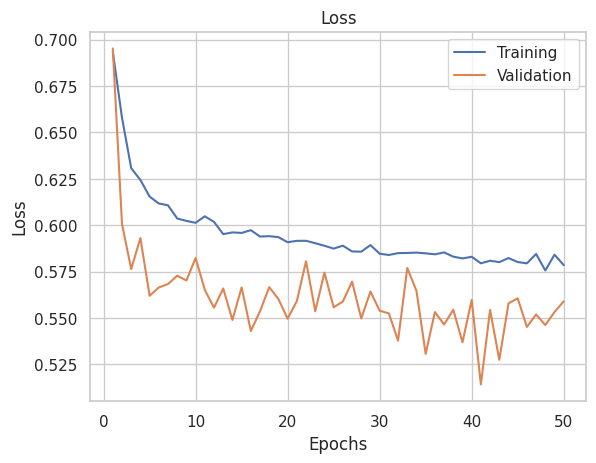

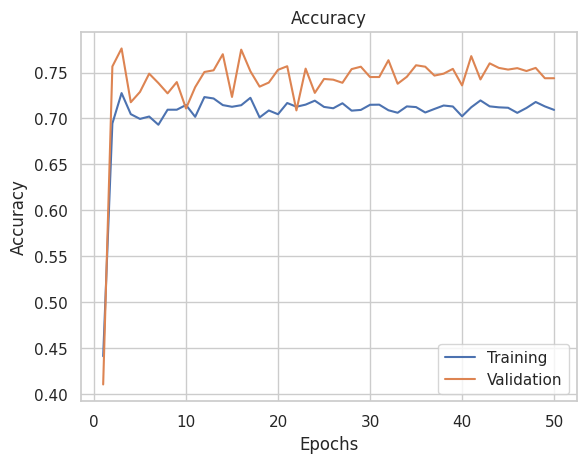

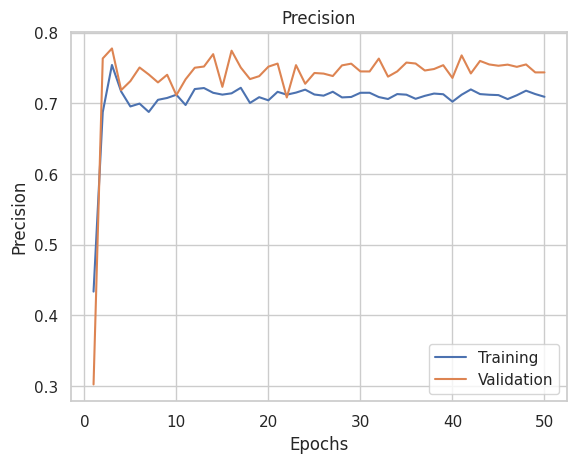

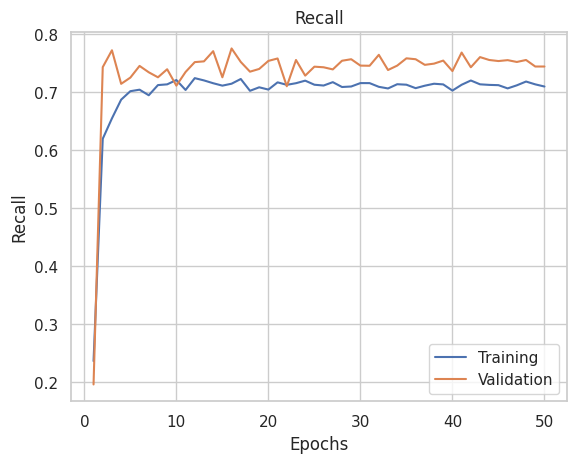

In [ ]:
plot_metrics(history, "Loss")
plot_metrics(history, "Accuracy")
plot_metrics(history, "Precision")
plot_metrics(history, "Recall")

## Validate the model and comment the results

As seen in the graphs, the **validation loss** is sometimes lower than the training loss. Both training and validation losses drop significantly in the first few epochs, indicating that the model is quickly learning from the data.

After around 10 epochs, the training loss begins to stabilize, while the validation loss continues to fluctuate. This could be a sign of instability in generalizing to the validation set, possibly due to the limited data for the defaulting class. With fewer examples of this minority class, the model may struggle to generalize patterns for defaulting cases, leading to these fluctuations in validation loss.

As mentioned above, **accuracy** represents the proportion of correctly classified instances across the dataset. However, given the class imbalance, accuracy may be easier to achieve by primarily focusing on the majority class (class 0). Therefore, accuracy alone is not a true indicator of the model's strength in identifying **both classes effectively**.

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


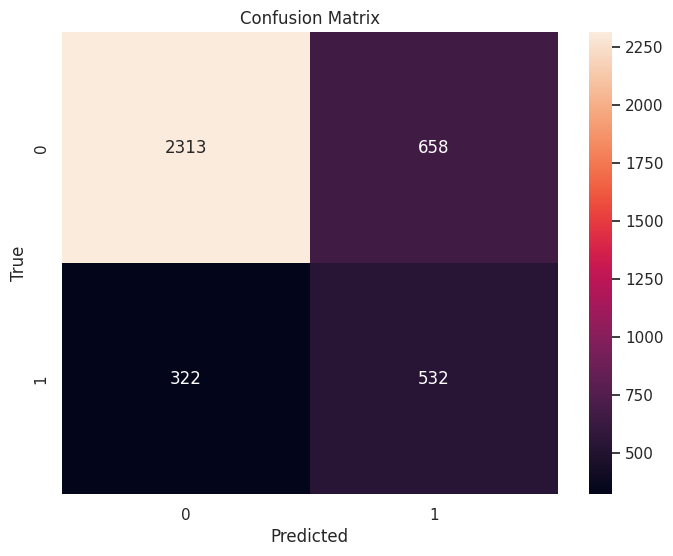

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      2971
           1       0.45      0.62      0.52       854

    accuracy                           0.74      3825
   macro avg       0.66      0.70      0.67      3825
weighted avg       0.78      0.74      0.76      3825



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(labels[y_true_classes], labels[y_pred_classes]))

1. **Class 0 (Non-defaulting)**:
   - **Precision**: 0.88 - This indicates that 88% of the cases predicted as non-defaulting are correct.
   - **Recall**: 0.78 - The model correctly identifies 78% of actual non-defaulting cases.
   - **F1-Score**: 0.83 - This score shows a good balance between precision and recall for this class, reflecting that both accuracy in positive predictions and coverage of non-defaulting cases are strong.

2. **Class 1 (Defaulting)**:
   - **Precision**: 0.45 - The lower precision indicates some difficulty in accurately classifying defaults, possibly due to the class imbalance.
   - **Recall**: 0.62 - The model correctly identifies 62% of actual default instances, which is promising given the challenge and data distribution.
   - **F1-Score**: 0.52 - This score demonstrates moderate effectiveness in capturing both precision and recall for defaults. Given the limited dataset size and the imbalanced class distribution, this score is relatively good, showing that the model maintains a balance between precision and recall for default classification.

## Make predictions (on the provided test set)


I have worked to generalize the model’s learning as much as possible. Given that the dataset contains very few instances classified as defaulters, significantly improving performance has been challenging.

I experimented with various network parameters and validation/training set configurations, but this seems to be the best setup. For example, I increased the validation set to 20% of the data, added more layers to the network (which led to a decrease in performance), and tried reducing or removing dropout, but none of these changes improved the results.

Overall, I believe I have achieved a reasonably good result with this configuration.


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 1/test.csv')
test_data = test_data.drop(['ID'], axis=1)

test_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,180000,2,2,1,32,-1,2,-1,0,-1,...,7658,1000,1650,1000,0,7667,0,1650,1000,2000
1,50000,2,2,1,43,0,0,0,-1,0,...,20165,10732,10566,10757,1800,1775,10732,384,757,501
2,240000,2,1,1,42,1,-1,-1,-2,-2,...,0,0,0,0,6370,0,0,0,0,0
3,180000,1,2,2,28,-1,-1,-1,-1,-1,...,832,332,416,416,0,416,332,500,3500,832
4,320000,2,1,1,39,0,0,0,0,0,...,128832,133329,53870,13185,5000,15000,5000,5000,3000,5000


In [ ]:
categorical_columns

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [ ]:
numerical_columns

['LIMIT_BAL',
 'AGE',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6']

In [ ]:
for col in categorical_columns:
  print(test_data[col].value_counts())

SEX
2    2707
1    1793
Name: count, dtype: int64
EDUCATION
2    2059
1    1609
3     755
5      53
4      18
6       5
0       1
Name: count, dtype: int64
MARRIAGE
2    2440
1    2012
3      43
0       5
Name: count, dtype: int64
PAY_0
 0    2219
-1     830
 1     550
-2     446
 2     385
 3      53
 4      14
 8       1
 5       1
 7       1
Name: count, dtype: int64
PAY_2
 0    2362
-1     906
-2     583
 2     575
 3      49
 4      16
 1       4
 6       2
 5       2
 7       1
Name: count, dtype: int64
PAY_3
 0    2386
-1     871
-2     631
 2     561
 3      35
 4       7
 7       5
 5       3
 6       1
Name: count, dtype: int64
PAY_4
 0    2466
-1     820
-2     689
 2     483
 3      22
 7      10
 4       9
 5       1
Name: count, dtype: int64
PAY_5
 0    2541
-1     820
-2     721
 2     376
 3      26
 7      10
 4       6
Name: count, dtype: int64
PAY_6
 0    2453
-1     860
-2     750
 2     396
 3      24
 7       8
 4       5
 6       3
 5       1
Name: count, dtype: 

In [ ]:
fil = (test_data.EDUCATION == 5) | (test_data.EDUCATION == 6) | (test_data.EDUCATION == 0)
test_data.loc[fil, 'EDUCATION'] = 4
test_data.EDUCATION.value_counts()

,count
EDUCATION,
2,2059
1,1609
3,755
4,77


In [ ]:
test_data.loc[test_data.MARRIAGE == 0, 'MARRIAGE'] = 3
test_data.MARRIAGE.value_counts()

,count
MARRIAGE,
2,2440
1,2012
3,48


In [ ]:
test_data = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)
df_copy = data.copy()
df_copy = df_copy.drop(['IS_DEFAULT'], axis=1)
df_copy.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0.249470,0.270722,-0.659913,-0.651976,-0.639166,-0.632699,-0.619951,-0.609359,-0.173823,-0.141246,...,False,False,False,False,False,False,False,False,False,False
1,0.480240,-0.164050,2.478326,2.601662,1.586975,1.738241,1.858400,1.870479,0.204435,-0.020384,...,False,False,True,False,False,False,False,False,False,False
2,-0.904380,0.705494,-0.043672,-0.015276,0.023841,0.092719,-0.257011,-0.235848,-0.235973,-0.160522,...,False,False,True,False,False,False,False,False,False,False
3,-1.135150,-0.707514,-0.467115,-0.690946,-0.676145,-0.672602,-0.662189,-0.652454,-0.344566,-0.249215,...,False,False,False,False,False,False,False,False,False,False
4,-1.058226,2.553274,-0.314439,-0.279052,-0.262758,-0.199745,-0.171664,-0.168062,-0.224455,-0.240816,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
dummy_columns = df_copy.columns[X.dtypes == 'bool']
dummy_columns.shape

(64,)

In [ ]:
for col in dummy_columns:
    if col not in test_data.columns:
        test_data[col] = False

test_data.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_2_8,PAY_3_1,PAY_3_8,PAY_4_1,PAY_4_6,PAY_4_8,PAY_5_5,PAY_5_6,PAY_5_8,PAY_6_8
0,180000,32,1991,991,7658,1000,1650,1000,0,7667,...,False,False,False,False,False,False,False,False,False,False
1,50000,43,23587,24580,20165,10732,10566,10757,1800,1775,...,False,False,False,False,False,False,False,False,False,False
2,240000,42,0,6370,0,0,0,0,6370,0,...,False,False,False,False,False,False,False,False,False,False
3,180000,28,1832,0,832,332,416,416,0,416,...,False,False,False,False,False,False,False,False,False,False
4,320000,39,206461,117168,128832,133329,53870,13185,5000,15000,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
test_data[numerical_columns] = test_data[numerical_columns].astype(float)

scaler = StandardScaler()
test_data[numerical_columns] = scaler.fit_transform(test_data[numerical_columns])

In [ ]:
test_data.shape

(4500, 78)

In [ ]:
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[1 0 1 ... 1 1 0]


In [ ]:
output = pd.DataFrame(predicted_labels)
output.to_csv('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 1/test_predictions_prova3.csv', index=False, header=False)

# OPTIONAL -- Export the predictions in the format indicated in the assignment release page and verify you prediction on the [assessment page](https://aml-assignmentone-2425.streamlit.app/).

I uploaded the results to the Streamlit page and obtained an accuracy of 0.7771 and an F1-score of 0.5017 (result name: ab3)